# Operating Performance - Airport Commercial Indicators
## Project Introduction to Data Science - CAP 394 INPE
### Satisfaction Survey (Source: SAC - Civil Aviation Secretariat)

### Define libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### The data has been downloaded and saved to a local folder where it can be obtained from: https://horus.labtrans.ufsc.br/gerencial/#DesempenhoOperacional/ResultadosGerais
### Annual Period - 2018
### All Search Airports (20 airports)
###  Airport Commercial Indicators

### In Brazil, a permanent survey is carried out by the Civil Aviation Secretariat - SAC (2019), with the purpose of measuring the satisfaction of the passengers of the 20 main Brazilian airports. The evaluated criteria include check-in, migratory and customs control, security inspection, commercial facilities, airport environment, boarding and landing services. The results contribute to identify challenges, improve competitiveness and reveal the evolution of the terminals evaluated.

### Import CSV file

In [3]:
import csv

df = pd.read_csv("Data\\dados.csv", sep=';') 
df

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


### Creating a list from a dataframe

In [4]:
dados=list(df)
print(dados)

['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto', 'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta', 'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo', 'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto', 'MeioDeTransportePublicoUtilizado', 'OutroMeioDeTransportePublicoUtilizado', 'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio', 'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca', 'CordialidadeDosFuncionariosDaInspecaoDeSeguranca', 'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo', 'DistanciaCaminhadaNoTerminalDePassageiros', 'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas', 'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios', 'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque', 'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAeroporto', 'ConfortoNaSalaDeEmbarque', 'ConfortoTermicoDoAeroporto', 'ConfortoAcusticoDoAeroporto', 'Info

# DATABASE QUESTIONS
### 1 - Which airports have data for analysis?
### 2 - What is the profile of the passengers who answered the surveys regarding commercial indicators?
### 3 - What% did you consume in relation to the total sample for the analyzed period?
### 4 - What is the scale used in the survey?
### 5 - What is the profile of the passengers they have consumed (commercial indicators)?
### 6 - How satisfied are passengers by airport and by indicator analyzed?
### 7 - What is the metric used to check passenger satisfaction?

In [5]:
for linha in dados[0:]:
    print (linha)

Linha
IcaoAerodromo
NomeAerodromo
Processo
SiglaAeroporto
Terminal
DataDaColeta
MesDaColeta
HorarioDoInicioDaColeta
HorarioDoFimDaColeta
CiaAerea
NumeroDoVoo
TipoDeVoo
Conexao
FormaDeCheckin
TipoDeTransporteParaOAeroporto
MeioDeTransportePublicoUtilizado
OutroMeioDeTransportePublicoUtilizado
DisponibilidadeDeCarrinhosDeBagagem
DisponibilidadeDeMeioFio
TempoDeFilaNaInspecaoDeSegurança
RigorNaInspecaoDeSeguranca
CordialidadeDosFuncionariosDaInspecaoDeSeguranca
FacilidadeDeEncontrarOCaminhoNoAeroporto
PaineisDeInformacaoDeVoo
DistanciaCaminhadaNoTerminalDePassageiros
CordialidadeDosFuncionariosDoAeroporto
DisponibilidadeDeTomadas
QualidadeDaInternetWiFi
DisponibilidadeDeSanitarios
LimpezaDosSanitarios
DisponibilidadeDeAssentosNaSalaDeEmbarque
SensacaoDeProtecaoESeguranca
LimpezaGeralDoAeroporto
ConfortoNaSalaDeEmbarque
ConfortoTermicoDoAeroporto
ConfortoAcusticoDoAeroporto
InformacaoNasEsteirasDeRestituicaoDeBagagem
InstalacoesDeEstacionamentoDeVeiculos
CustoDoEstacionamento
QuantidadeEQu

In [6]:
# Mostrar as cinco primeiras linhas, ou n=nro de linhas a visualizar: 
df.head(n=10)

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
0,1,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:45,14:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
1,2,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:40,14:45,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
2,3,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:05,14:10,...,NaN,NaN,NaN,Negócio,NaN,NaN,3 a 5,30min a 1h,NaN,31/03/2019
3,4,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:50,13:55,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,30min a 1h,NaN,31/03/2019
4,5,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:45,13:50,...,NaN,NaN,NaN,Lazer,NaN,NaN,Mais de 5,1h e 30min a 2h,NaN,31/03/2019
5,6,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,13:40,13:45,...,NaN,NaN,NaN,Negócio,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
6,7,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:20,14:25,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
7,8,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:35,14:40,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
8,9,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:25,14:30,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019
9,10,SBNT,Aeroporto Internacional de Natal,embarque,SBNT,1,29/05/2013,Maio,14:15,14:20,...,NaN,NaN,NaN,Lazer,NaN,NaN,0 a 2,1h e 30min a 2h,NaN,31/03/2019


In [7]:
# Exibe por padrão as últimas 5 linhas do DataFrame:
df.tail()

,Linha,IcaoAerodromo,NomeAerodromo,Processo,SiglaAeroporto,Terminal,DataDaColeta,MesDaColeta,HorarioDoInicioDaColeta,HorarioDoFimDaColeta,...,RendaDoEntrevistado,ViajandoSozinho,NumeroDeAcompanhantes,MotivoDaViagem,OutrosMotivosDeViagem,QuantDeViagensPartindoDesseAeroporto,FrequenciaDeViagem,TempoDeAntecedenciaDeChegadaParaOVoo,TempoDeEsperaEntreOsVoos,DataAtualizacao
431839,431840,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:00,19:01,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431840,431841,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:02,19:03,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431841,431842,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,23/03/2019,MARÇO,19:05,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431842,431843,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:02,19:02,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019
431843,431844,SBMO,Aeroporto Internacional de Maceió,DESEMBARQUE,SBMO,1,30/03/2019,MARÇO,19:04,19:05,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/03/2019


In [8]:
# Mostrar todo o Dataframe
print(df)

         Linha IcaoAerodromo                      NomeAerodromo     Processo  \
0            1          SBNT   Aeroporto Internacional de Natal     embarque   
1            2          SBNT   Aeroporto Internacional de Natal     embarque   
2            3          SBNT   Aeroporto Internacional de Natal     embarque   
3            4          SBNT   Aeroporto Internacional de Natal     embarque   
4            5          SBNT   Aeroporto Internacional de Natal     embarque   
5            6          SBNT   Aeroporto Internacional de Natal     embarque   
6            7          SBNT   Aeroporto Internacional de Natal     embarque   
7            8          SBNT   Aeroporto Internacional de Natal     embarque   
8            9          SBNT   Aeroporto Internacional de Natal     embarque   
9           10          SBNT   Aeroporto Internacional de Natal     embarque   
10          11          SBNT   Aeroporto Internacional de Natal     embarque   
11          12          SBNT   Aeroporto

In [9]:
# Descrição do Index
df.index

RangeIndex(start=0, stop=431844, step=1)

In [10]:
# Colunas presentes no DataFrame
df.columns 

Index(['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto',
       'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta',
       'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo',
       'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto',
       'MeioDeTransportePublicoUtilizado',
       'OutroMeioDeTransportePublicoUtilizado',
       'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio',
       'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca',
       'CordialidadeDosFuncionariosDaInspecaoDeSeguranca',
       'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo',
       'DistanciaCaminhadaNoTerminalDePassageiros',
       'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas',
       'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios',
       'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque',
       'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAe

In [11]:
# Contagem de dados não-nulos
df.count()

Linha                                                              431844
IcaoAerodromo                                                      431844
NomeAerodromo                                                      431844
Processo                                                           431844
SiglaAeroporto                                                     431844
Terminal                                                           431844
DataDaColeta                                                       431844
MesDaColeta                                                        431844
HorarioDoInicioDaColeta                                            428617
HorarioDoFimDaColeta                                               426006
CiaAerea                                                           331920
NumeroDoVoo                                                        302699
TipoDeVoo                                                          431792
Conexao                               

In [12]:
# Criando uma nova coluna em um DataFrame:
df['Nova Coluna'] = 0
# Colunas presentes no DataFrame
df.columns 

Index(['Linha', 'IcaoAerodromo', 'NomeAerodromo', 'Processo', 'SiglaAeroporto',
       'Terminal', 'DataDaColeta', 'MesDaColeta', 'HorarioDoInicioDaColeta',
       'HorarioDoFimDaColeta', 'CiaAerea', 'NumeroDoVoo', 'TipoDeVoo',
       'Conexao', 'FormaDeCheckin', 'TipoDeTransporteParaOAeroporto',
       'MeioDeTransportePublicoUtilizado',
       'OutroMeioDeTransportePublicoUtilizado',
       'DisponibilidadeDeCarrinhosDeBagagem', 'DisponibilidadeDeMeioFio',
       'TempoDeFilaNaInspecaoDeSegurança', 'RigorNaInspecaoDeSeguranca',
       'CordialidadeDosFuncionariosDaInspecaoDeSeguranca',
       'FacilidadeDeEncontrarOCaminhoNoAeroporto', 'PaineisDeInformacaoDeVoo',
       'DistanciaCaminhadaNoTerminalDePassageiros',
       'CordialidadeDosFuncionariosDoAeroporto', 'DisponibilidadeDeTomadas',
       'QualidadeDaInternetWiFi', 'DisponibilidadeDeSanitarios',
       'LimpezaDosSanitarios', 'DisponibilidadeDeAssentosNaSalaDeEmbarque',
       'SensacaoDeProtecaoESeguranca', 'LimpezaGeralDoAe

In [13]:
# Mostrar o tamanho do Dataframe (a primeira linha não é computada, pois refere-se ao título das colunas)
df.shape

(431844, 91)

### Plot the chart of the chosen column

In [14]:
df["NomeAerodromo"].value_counts()

Aeroporto Internacional de São Paulo             48340
Aeroporto Internacional do Rio de Janeiro        44940
Aeroporto Internacional de Salvador              28388
Aeroporto Internacional de Brasília              27734
Aeroporto Internacional de Manaus                26904
Aeroporto Internacional de Confins               25699
Aeroporto Internacional de Viracopos/Campinas    25114
Aeroporto Internacional de Recife                24189
Aeroporto Internacional de Porto Alegre          24156
Aeroporto Internacional de Curitiba              22823
Aeroporto Internacional de Fortaleza             22090
Aeroporto Internacional de Cuiabá                18778
Aeroporto de São Paulo/Congonhas                 17758
Aeroporto do Rio de Janeiro                      16710
Aeroporto de São Gonçalo do Amarante             15255
Aeroporto Internacional de Belém                  8581
Aeroporto Internacional de Florianópolis          7902
Aeroporto de Goiânia                              7812
Aeroporto 

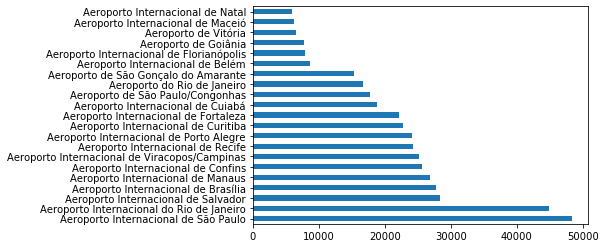

In [15]:
df["NomeAerodromo"].value_counts().plot.barh()

In [16]:
df["ValorDosProdutosComerciais"].value_counts()

3.0    42786
1.0    34094
2.0    30109
4.0    26434
5.0     8823
Name: ValorDosProdutosComerciais, dtype: int64

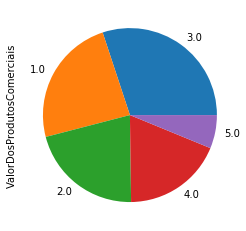

In [17]:
df["ValorDosProdutosComerciais"].value_counts().plot.pie()

In [ ]:
df.index